In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# --- Load & filter ---
df_all = pd.read_csv("yearly_full_release_long_format.csv")


In [20]:

df_Oceania = df_all[
    (df_all["Continent"] == "Oceania") &
    (df_all["Area type"] == "Country or economy") &
    (df_all["Category"] == "Electricity generation") &
    (df_all["Subcategory"] == "Fuel") &
    (df_all["Unit"] == "TWh")
].copy()

# --- Aggregate & pivot ---
mix_Oceania = df_Oceania.groupby(["Year", "Variable"], as_index=False)["Value"].sum()

mix_Oceania.head(20)


,Year,Variable,Value
0,2000,Bioenergy,1.87
1,2000,Coal,181.43
2,2000,Gas,26.71
3,2000,Hydro,42.59
4,2000,Nuclear,0.00
5,2000,Other Fossil,7.45
6,2000,Other Renewables,2.76
7,2000,Solar,0.05
8,2000,Wind,0.26
9,2001,Bioenergy,1.65


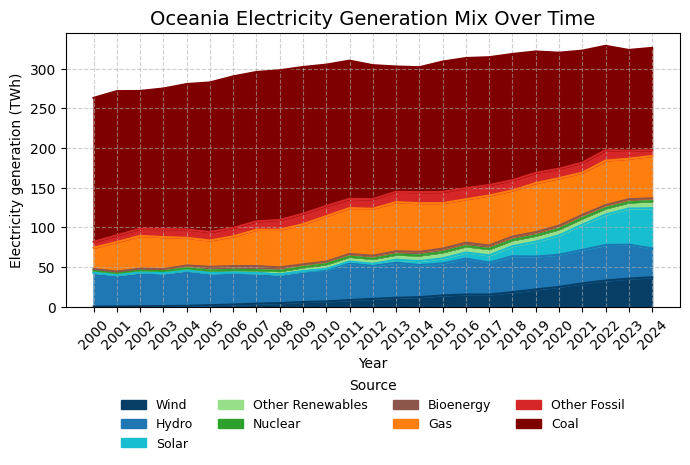

In [21]:

mix_pivot_Oceania = (
    mix_Oceania
    .pivot(index="Year", columns="Variable", values="Value")
    .fillna(0)
)

# --- Desired order (clean → dirty) ---
energy_order = [
    "Wind",
    "Hydro",
    "Solar",
    "Other Renewables",
    "Nuclear",
    "Bioenergy",
    "Gas",
    "Other Fossil",
    "Coal"
]

# Keep only existing columns & reorder
energy_order = [e for e in energy_order if e in mix_pivot_Oceania.columns]
mix_pivot_Oceania = mix_pivot_Oceania[energy_order]

# --- Color map ---
energy_color_map = {
    "Wind": "#073e66",
    "Hydro": "#1f77b4",
    "Solar": "#17becf",
    "Other Renewables":"#98df8a",
    "Nuclear": "#2ca02c",
    "Bioenergy": "#8c564b",
    "Gas": "#ff7f0e",
    "Other Fossil": "#d62728",
    "Coal": "#7f0000"
}

colors = [energy_color_map[e] for e in mix_pivot_Oceania.columns]

# --- Plot ---
fig, ax = plt.subplots(figsize=(7, 5))

mix_pivot_Oceania.plot(
    kind="area",
    stacked=True,
    ax=ax,
    color=colors
)

ax.set_title("Oceania Electricity Generation Mix Over Time", fontsize=14)
ax.set_xlabel("Year")
ax.set_ylabel("Electricity generation (TWh)")

ax.set_xticks(mix_pivot_Oceania.index)
ax.set_xticklabels(mix_pivot_Oceania.index, rotation=45)

ax.grid(True, axis="both", linestyle="--", alpha=0.6)

# Legend follows column order automatically
ax.legend(
    title="Source",
    loc="upper center",
    bbox_to_anchor=(0.5, -0.22),
    ncol=4,
    fontsize=9,
    title_fontsize=10,
    frameon=False
)

plt.tight_layout()
plt.show()


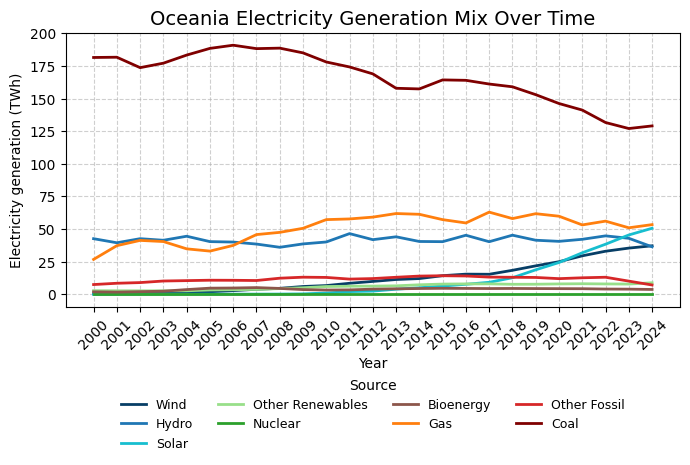

In [5]:

df_Oceania = df_all[
    (df_all["Continent"] == "Oceania") &
    (df_all["Area type"] == "Country or economy") &
    (df_all["Category"] == "Electricity generation") &
    (df_all["Subcategory"] == "Fuel") &
    (df_all["Unit"] == "TWh")
].copy()

# --- Aggregate & pivot ---
mix_Oceania = df_Oceania.groupby(["Year", "Variable"], as_index=False)["Value"].sum()

mix_pivot_Oceania = (
    mix_Oceania
    .pivot(index="Year", columns="Variable", values="Value")
    .fillna(0)
)

# --- Desired order (clean → dirty) ---
energy_order = [
    "Wind",
    "Hydro",
    "Solar",
    "Other Renewables",
    "Nuclear",
    "Bioenergy",
    "Gas",
    "Other Fossil",
    "Coal"
]

# Keep only existing columns & reorder
energy_order = [e for e in energy_order if e in mix_pivot_Oceania.columns]
mix_pivot_Oceania = mix_pivot_Oceania[energy_order]

# --- Color map ---
energy_color_map = {
    "Wind": "#073e66",
    "Hydro": "#1f77b4",
    "Solar": "#17becf",
    "Other Renewables":"#98df8a",
    "Nuclear": "#2ca02c",
    "Bioenergy": "#8c564b",
    "Gas": "#ff7f0e",
    "Other Fossil": "#d62728",
    "Coal": "#7f0000"
}

colors = [energy_color_map[e] for e in mix_pivot_Oceania.columns]

# --- Plot ---
fig, ax = plt.subplots(figsize=(7, 5))

mix_pivot_Oceania.plot(
    kind="line",
    stacked=False,
    linewidth=2,
    ax=ax,
    color=colors
)

ax.set_title("Oceania Electricity Generation Mix Over Time", fontsize=14)
ax.set_xlabel("Year")
ax.set_ylabel("Electricity generation (TWh)")

ax.set_xticks(mix_pivot_Oceania.index)
ax.set_xticklabels(mix_pivot_Oceania.index, rotation=45)

ax.grid(True, axis="both", linestyle="--", alpha=0.6)

# Legend follows column order automatically
ax.legend(
    title="Source",
    loc="upper center",
    bbox_to_anchor=(0.5, -0.22),
    ncol=4,
    fontsize=9,
    title_fontsize=10,
    frameon=False
)

plt.tight_layout()
plt.show()

In [6]:

df_Oceania_quota = mix_Oceania.copy()

df_Oceania_quota["Quota"] = (
    df_Oceania_quota["Value"] /
    df_Oceania_quota.groupby("Year")["Value"].transform("sum")
)


df_Oceania_quota.head()


,Year,Variable,Value,Quota
0,2000,Bioenergy,1.87,0.007107
1,2000,Coal,181.43,0.689533
2,2000,Gas,26.71,0.101513
3,2000,Hydro,42.59,0.161865
4,2000,Nuclear,0.00,0.000000


In [7]:

df_Oceania_quota.groupby("Year")["Quota"].sum()


Year
2000    1.0
2001    1.0
2002    1.0
2003    1.0
2004    1.0
2005    1.0
2006    1.0
2007    1.0
2008    1.0
2009    1.0
2010    1.0
2011    1.0
2012    1.0
2013    1.0
2014    1.0
2015    1.0
2016    1.0
2017    1.0
2018    1.0
2019    1.0
2020    1.0
2021    1.0
2022    1.0
2023    1.0
2024    1.0
Name: Quota, dtype: float64

In [8]:

mix_Oceania_aggregate = df_all[
    (df_all["Continent"] == "Oceania") &
    (df_all["Area type"] == "Country or economy") &
    (df_all["Category"] == "Electricity generation") &
    (df_all["Subcategory"] == "Aggregate fuel") &
    (df_all["Unit"] == "TWh")
].copy()

mix_Oceania_aggregate.head()
df_Oceania_quota = mix_Oceania_aggregate.copy()

df_Oceania_quota["Quota"] = (
    df_Oceania_quota["Value"] /
    df_Oceania_quota.groupby("Year")["Value"].transform("sum")
)


In [9]:


df_Oceania_quota.head()


,Area,ISO 3 code,Year,Area type,Continent,Ember region,EU,OECD,G20,G7,ASEAN,Category,Subcategory,Variable,Unit,Value,YoY absolute change,YoY % change,Quota
6425,American Samoa,ASM,2000,Country or economy,Oceania,Oceania,0.0,0.0,0.0,0.0,0.0,Electricity generation,Aggregate fuel,Clean,TWh,0.00,NaN,NaN,0.000000
6426,American Samoa,ASM,2000,Country or economy,Oceania,Oceania,0.0,0.0,0.0,0.0,0.0,Electricity generation,Aggregate fuel,Fossil,TWh,0.17,NaN,NaN,0.000433
6427,American Samoa,ASM,2000,Country or economy,Oceania,Oceania,0.0,0.0,0.0,0.0,0.0,Electricity generation,Aggregate fuel,Gas and Other Fossil,TWh,0.17,NaN,NaN,0.000433
6428,American Samoa,ASM,2000,Country or economy,Oceania,Oceania,0.0,0.0,0.0,0.0,0.0,Electricity generation,Aggregate fuel,"Hydro, Bioenergy and Other Renewables",TWh,0.00,NaN,NaN,0.000000
6429,American Samoa,ASM,2000,Country or economy,Oceania,Oceania,0.0,0.0,0.0,0.0,0.0,Electricity generation,Aggregate fuel,Renewables,TWh,0.00,NaN,NaN,0.000000


In [10]:


df_Oceania_quota.groupby("Year")["Quota"].sum()

df_production_mix_Oceania_2000_2025 = (
    df_Oceania_quota
    .groupby("Variable", as_index=False)["Value"]
    .sum()
)
df_production_mix_Oceania_2000_2025.head(9)
df_production_mix_Oceania_2000_2025["Quota"] = (
    df_production_mix_Oceania_2000_2025["Value"] /
    df_production_mix_Oceania_2000_2025["Value"].sum()
)
df_production_mix_Oceania_2000_2025["Quota"].sum()
df_plot = df_production_mix_Oceania_2000_2025.sort_values("Quota", ascending=False)

df_Oceania_quota_2000_2010 = df_Oceania_quota[df_Oceania_quota["Year"] <= 2010]
df_Oceania_quota_2010_2024 = df_Oceania_quota[df_Oceania_quota["Year"] > 2010]
df_production_mix_Oceania_2000_2010 = (
    df_Oceania_quota_2000_2010
    .groupby("Variable", as_index=False)["Value"]
    .sum()
)


df_production_mix_Oceania_2010_2025 = (
    df_Oceania_quota_2010_2024
    .groupby("Variable", as_index=False)["Value"]
    .sum()
)

df_production_mix_Oceania_2000_2010["Quota"] = (
    df_production_mix_Oceania_2000_2010["Value"] /
    df_production_mix_Oceania_2000_2010["Value"].sum()
)

df_production_mix_Oceania_2010_2025["Quota"] = (
    df_production_mix_Oceania_2010_2025["Value"] /
    df_production_mix_Oceania_2010_2025["Value"].sum()
)


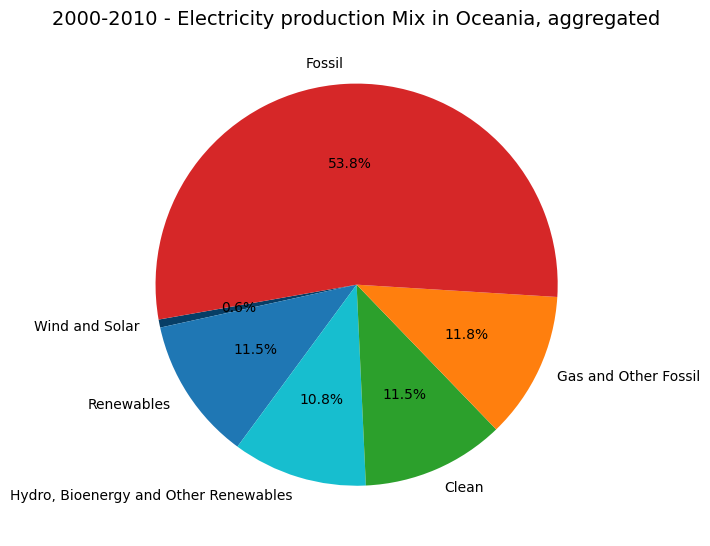

In [11]:
df_source = df_production_mix_Oceania_2000_2010

# Ordine (più clean → più fossile) per la versione "aggregated"
energy_order = [
    "Wind and Solar",
    "Renewables",
    "Hydro, Bioenergy and Other Renewables",
    "Clean",
    "Gas and Other Fossil",
    "Fossil"
]

# Color coding coerente (blu/verde = low/zero emission → arancio/rosso = fossili)
energy_color_map = {
    "Wind and Solar": "#073e66",                         # blu scuro (emission free)
    "Renewables": "#1f77b4",                             # blu (rinnovabili)
    "Hydro, Bioenergy and Other Renewables": "#17becf",  # azzurro/ciano (rinnovabili mix)
    "Clean": "#2ca02c",                                  # verde (low/very low emission)
    "Gas and Other Fossil": "#ff7f0e",                   # arancione (medie emissioni)
    "Fossil": "#d62728"                                  # rosso (alte emissioni)
}

# Prepara dataframe ordinato
df_plot = df_source.copy()

energy_order_plot = [e for e in energy_order if e in df_plot["Variable"].values]

df_plot["Variable"] = pd.Categorical(
    df_plot["Variable"],
    categories=energy_order_plot,
    ordered=True
)

df_plot = df_plot.sort_values("Variable")

colors = [energy_color_map[v] for v in df_plot["Variable"]]

# Plot
fig, ax = plt.subplots(figsize=(7, 7))

ax.pie(
    df_plot["Quota"],
    labels=df_plot["Variable"],      # <-- labels al posto della legenda
    colors=colors,
    autopct="%1.1f%%",
    startangle=190
)

ax.set_title("2000-2010 - Electricity production Mix in Oceania, aggregated", fontsize=14)

plt.tight_layout()
plt.show()


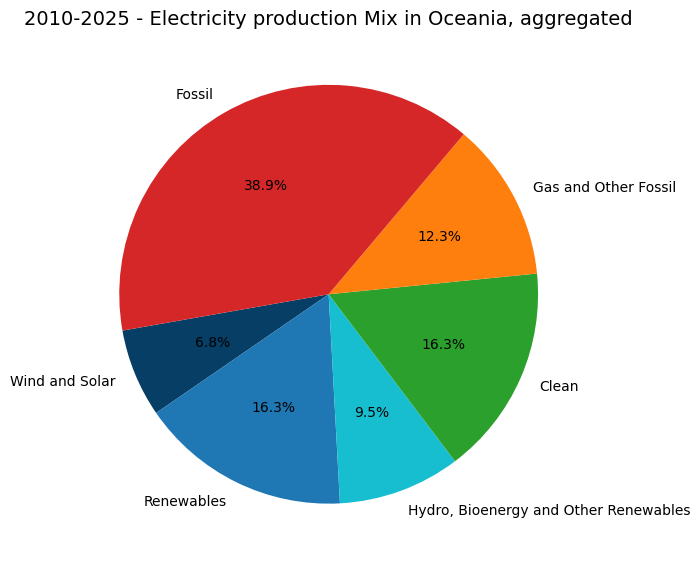

In [12]:

df_source = df_production_mix_Oceania_2010_2025

# Ordine (più clean → più fossile) per la versione "aggregated"
energy_order = [
    "Wind and Solar",
    "Renewables",
    "Hydro, Bioenergy and Other Renewables",
    "Clean",
    "Gas and Other Fossil",
    "Fossil"
]

# Color coding coerente (blu/verde = low/zero emission → arancio/rosso = fossili)
energy_color_map = {
    "Wind and Solar": "#073e66",                         # blu scuro (emission free)
    "Renewables": "#1f77b4",                             # blu (rinnovabili)
    "Hydro, Bioenergy and Other Renewables": "#17becf",  # azzurro/ciano (rinnovabili mix)
    "Clean": "#2ca02c",                                  # verde (low/very low emission)
    "Gas and Other Fossil": "#ff7f0e",                   # arancione (medie emissioni)
    "Fossil": "#d62728"                                  # rosso (alte emissioni)
}

# Prepara dataframe ordinato
df_plot = df_source.copy()

energy_order_plot = [e for e in energy_order if e in df_plot["Variable"].values]

df_plot["Variable"] = pd.Categorical(
    df_plot["Variable"],
    categories=energy_order_plot,
    ordered=True
)

df_plot = df_plot.sort_values("Variable")

colors = [energy_color_map[v] for v in df_plot["Variable"]]

# Plot
fig, ax = plt.subplots(figsize=(7, 7))

ax.pie(
    df_plot["Quota"],
    labels=df_plot["Variable"],      # <-- labels al posto della legenda
    colors=colors,
    autopct="%1.1f%%",
    startangle=190
)

ax.set_title("2010-2025 - Electricity production Mix in Oceania, aggregated", fontsize=14)

plt.tight_layout()
plt.show()


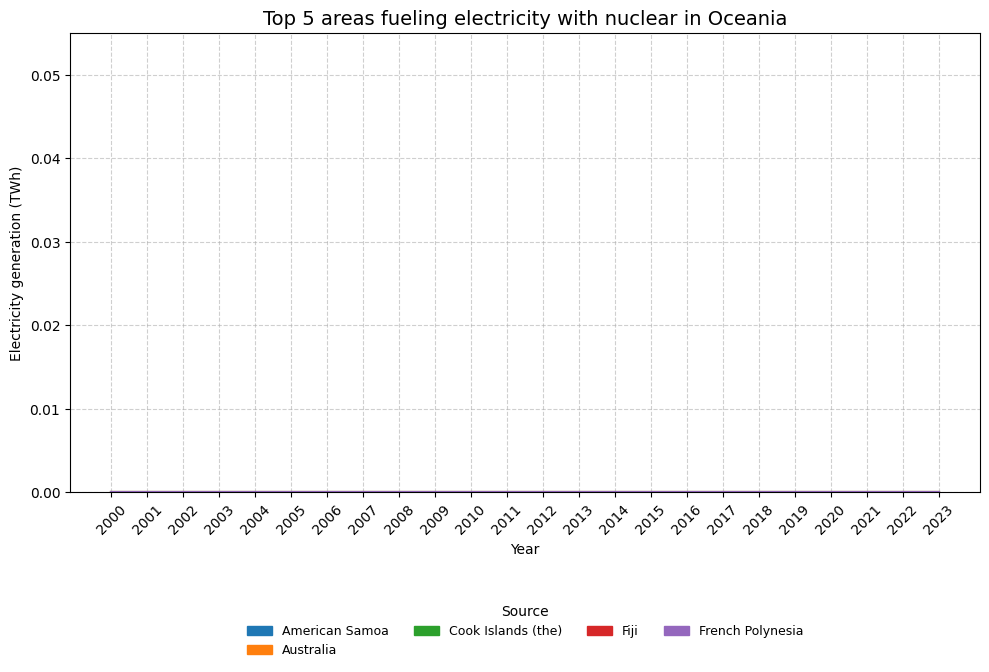

In [13]:

df_nuclear_Oceania = df_all[
    (df_all["Continent"] == "Oceania") &
    (df_all["Area type"] == "Country or economy") &
    (df_all["Category"] == "Electricity generation") &
    (df_all["Subcategory"] == "Fuel") &
    (df_all["Variable"] == "Nuclear") &
    (df_all["Unit"] == "TWh")
].copy()
df_nuclear_Oceania.head()
nuclear_comparison_Oceania = df_nuclear_Oceania.groupby(["Year", "Area"], as_index=False)["Value"].sum()

top_5_areas_nuclear = (
    nuclear_comparison_Oceania
    .groupby("Area")["Value"]
    .sum()
    .sort_values(ascending=False)
    .head(5)
    .index
)

nuclear_comparison_top5 = nuclear_comparison_Oceania[
    nuclear_comparison_Oceania["Area"].isin(top_5_areas_nuclear)]

mix_pivot_nuclear_Oceania = (
    nuclear_comparison_top5
    .pivot(index="Year", columns="Area", values="Value")
    .fillna(0)
)

fig, ax = plt.subplots(figsize=(10, 7)) 

mix_pivot_nuclear_Oceania.plot(
    kind="area",
    stacked=True,
    ax=ax
)

ax.set_title("Top 5 areas fueling electricity with nuclear in Oceania", fontsize=14)
ax.set_xlabel("Year")
ax.set_ylabel("Electricity generation (TWh)")

ax.set_xticks(mix_pivot_nuclear_Oceania.index)
ax.set_xticklabels(mix_pivot_nuclear_Oceania.index, rotation=45)

ax.grid(
    True,
    axis="both",
    linestyle="--",
    alpha=0.6
)

ax.legend(
    title="Source",
    loc="upper center",
    bbox_to_anchor=(0.5, -0.22),
    ncol=4,                
    fontsize=9,
    title_fontsize=10,
    frameon=False
)

plt.tight_layout()
plt.show()


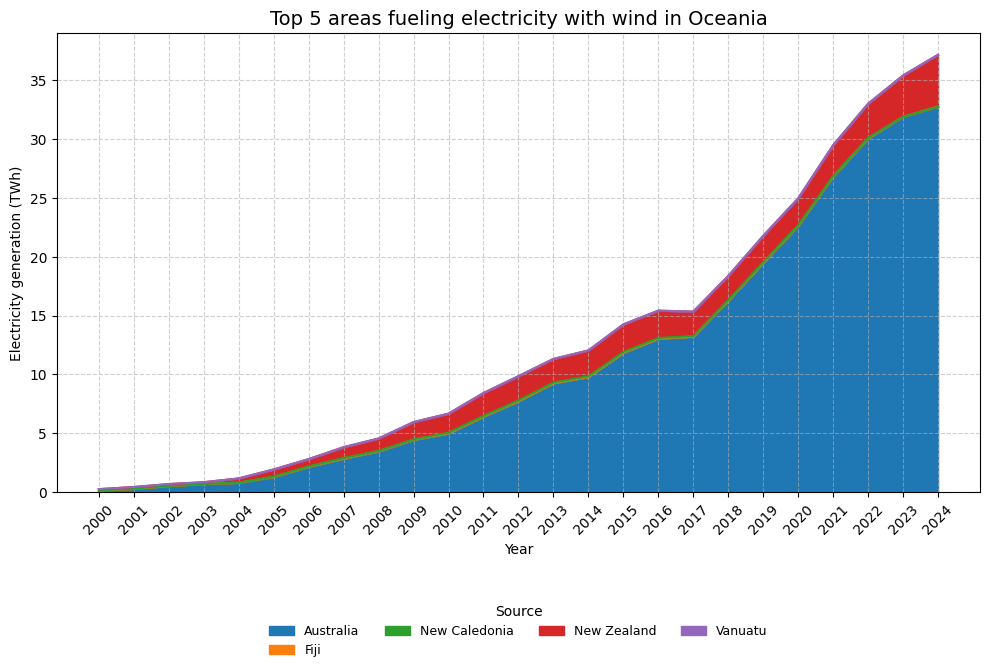

In [14]:

df_wind_Oceania = df_all[
    (df_all["Continent"] == "Oceania") &
    (df_all["Area type"] == "Country or economy") &
    (df_all["Category"] == "Electricity generation") &
    (df_all["Subcategory"] == "Fuel") &
    (df_all["Variable"] == "Wind") &
    (df_all["Unit"] == "TWh")
].copy()

wind_comparison_Oceania = df_wind_Oceania.groupby(["Year", "Area"], as_index=False)["Value"].sum()

top_5_areas_wind = (
    wind_comparison_Oceania
    .groupby("Area")["Value"]
    .sum()
    .sort_values(ascending=False)
    .head(5)
    .index
)

wind_comparison_top5 = wind_comparison_Oceania[
    wind_comparison_Oceania["Area"].isin(top_5_areas_wind)]
mix_pivot_wind_Oceania = (
    wind_comparison_top5
    .pivot(index="Year", columns="Area", values="Value")
    .fillna(0)
)

fig, ax = plt.subplots(figsize=(10, 7)) 

mix_pivot_wind_Oceania.plot(
    kind="area",
    stacked=True,
    ax=ax
)

ax.set_title("Top 5 areas fueling electricity with wind in Oceania", fontsize=14)
ax.set_xlabel("Year")
ax.set_ylabel("Electricity generation (TWh)")

ax.set_xticks(mix_pivot_wind_Oceania.index)
ax.set_xticklabels(mix_pivot_wind_Oceania.index, rotation=45)

ax.grid(
    True,
    axis="both",
    linestyle="--",
    alpha=0.6
)

ax.legend(
    title="Source",
    loc="upper center",
    bbox_to_anchor=(0.5, -0.22),
    ncol=4,                
    fontsize=9,
    title_fontsize=10,
    frameon=False
)

plt.tight_layout()
plt.show()


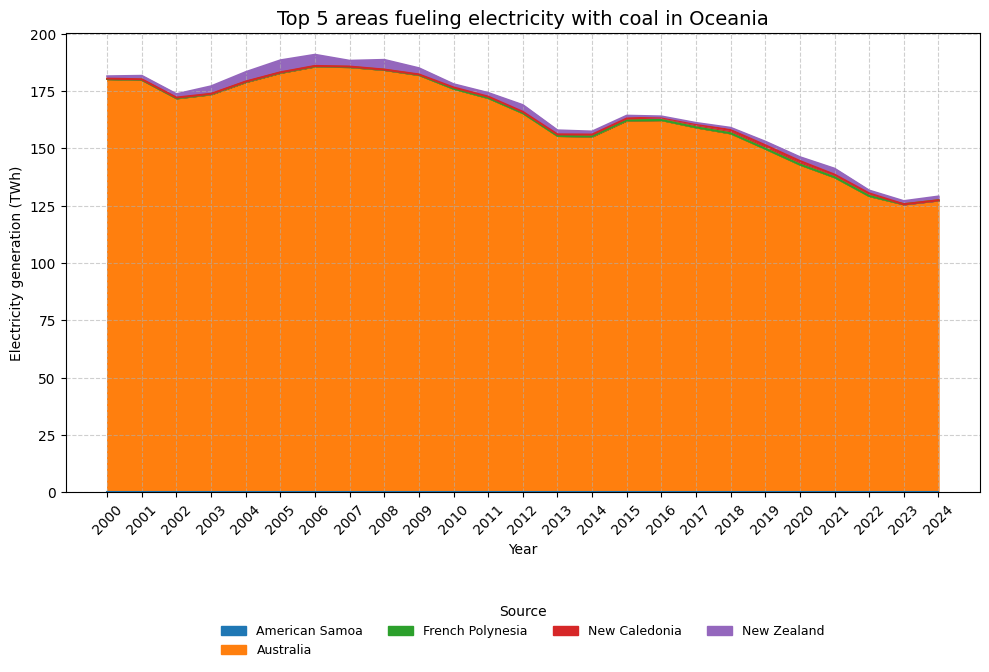

In [15]:

df_coal_Oceania = df_all[
    (df_all["Continent"] == "Oceania") &
    (df_all["Area type"] == "Country or economy") &
    (df_all["Category"] == "Electricity generation") &
    (df_all["Subcategory"] == "Fuel") &
    (df_all["Variable"] == "Coal") &
    (df_all["Unit"] == "TWh")
].copy()

coal_comparison_Oceania = df_coal_Oceania.groupby(["Year", "Area"], as_index=False)["Value"].sum()

top_5_areas_coals = (
    coal_comparison_Oceania
    .groupby("Area")["Value"]
    .sum()
    .sort_values(ascending=False)
    .head(5)
    .index
)

coal_comparison_top5 = coal_comparison_Oceania[
    coal_comparison_Oceania["Area"].isin(top_5_areas_coals)]
mix_pivot_coal_Oceania = (
    coal_comparison_top5
    .pivot(index="Year", columns="Area", values="Value")
    .fillna(0)
)

fig, ax = plt.subplots(figsize=(10, 7)) 

mix_pivot_coal_Oceania.plot(
    kind="area",
    stacked=True,
    ax=ax
)

ax.set_title("Top 5 areas fueling electricity with coal in Oceania", fontsize=14)
ax.set_xlabel("Year")
ax.set_ylabel("Electricity generation (TWh)")

ax.set_xticks(mix_pivot_coal_Oceania.index)
ax.set_xticklabels(mix_pivot_coal_Oceania
                   .index, rotation=45)

ax.grid(
    True,
    axis="both",
    linestyle="--",
    alpha=0.6
)

ax.legend(
    title="Source",
    loc="upper center",
    bbox_to_anchor=(0.5, -0.22),
    ncol=4,                
    fontsize=9,
    title_fontsize=10,
    frameon=False
)

plt.tight_layout()
plt.show()


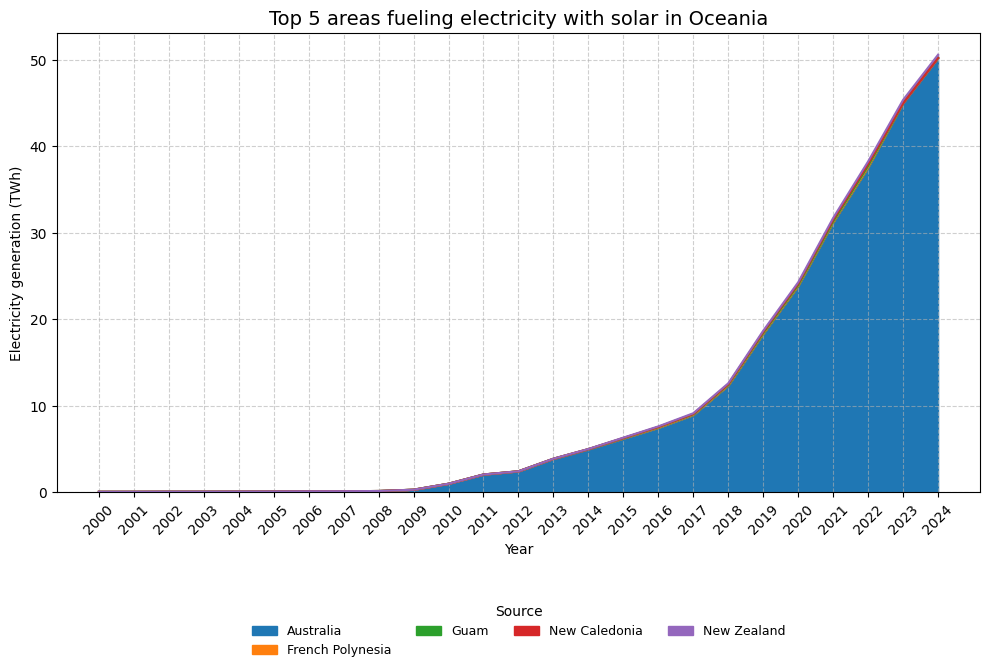

In [16]:
df_coal_Oceania = df_all[
    (df_all["Continent"] == "Oceania") &
    (df_all["Area type"] == "Country or economy") &
    (df_all["Category"] == "Electricity generation") &
    (df_all["Subcategory"] == "Fuel") &
    (df_all["Variable"] == "Solar") &
    (df_all["Unit"] == "TWh")
].copy()

solar_comparison_Oceania = df_coal_Oceania.groupby(["Year", "Area"], as_index=False)["Value"].sum()

top_5_areas_solar = (
    solar_comparison_Oceania
    .groupby("Area")["Value"]
    .sum()
    .sort_values(ascending=False)
    .head(5)
    .index
)

solar_comparison_top5 = solar_comparison_Oceania[
    solar_comparison_Oceania["Area"].isin(top_5_areas_solar)]
mix_pivot_solar_Oceania = (
    solar_comparison_top5
    .pivot(index="Year", columns="Area", values="Value")
    .fillna(0)
)

fig, ax = plt.subplots(figsize=(10, 7)) 

mix_pivot_solar_Oceania.plot(
    kind="area",
    stacked=True,
    ax=ax
)

ax.set_title("Top 5 areas fueling electricity with solar in Oceania", fontsize=14)
ax.set_xlabel("Year")
ax.set_ylabel("Electricity generation (TWh)")

ax.set_xticks(mix_pivot_solar_Oceania.index)
ax.set_xticklabels(mix_pivot_solar_Oceania
                   .index, rotation=45)

ax.grid(
    True,
    axis="both",
    linestyle="--",
    alpha=0.6
)

ax.legend(
    title="Source",
    loc="upper center",
    bbox_to_anchor=(0.5, -0.22),
    ncol=4,                
    fontsize=9,
    title_fontsize=10,
    frameon=False
)

plt.tight_layout()
plt.show()

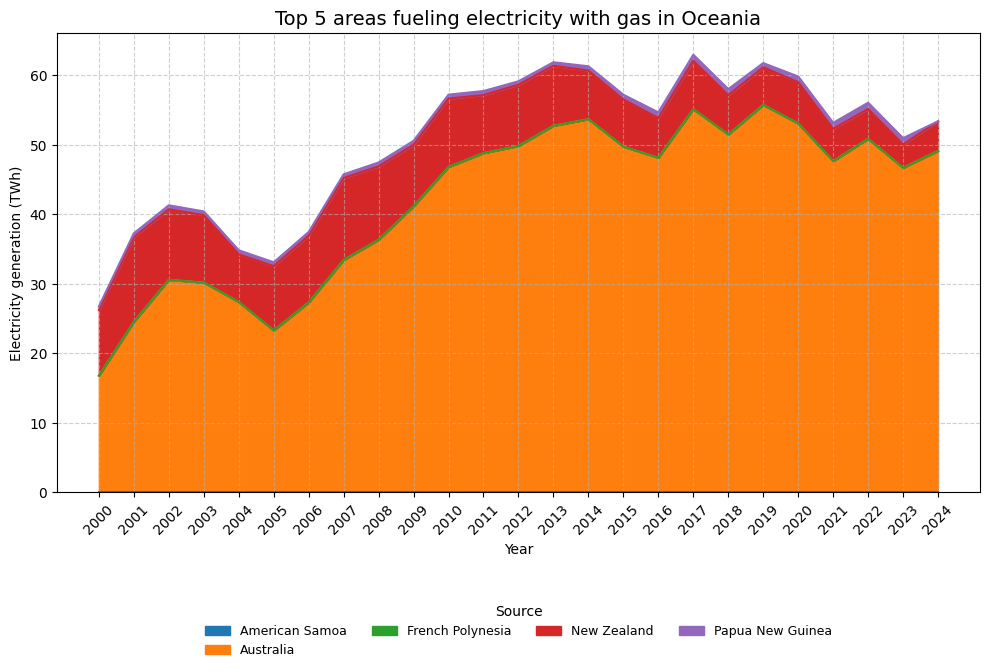

In [17]:
df_gas_Oceania = df_all[
    (df_all["Continent"] == "Oceania") &
    (df_all["Area type"] == "Country or economy") &
    (df_all["Category"] == "Electricity generation") &
    (df_all["Subcategory"] == "Fuel") &
    (df_all["Variable"] == "Gas") &
    (df_all["Unit"] == "TWh")
].copy()

gas_comparison_Oceania = df_gas_Oceania.groupby(["Year", "Area"], as_index=False)["Value"].sum()

top_5_areas_gas = (
    gas_comparison_Oceania
    .groupby("Area")["Value"]
    .sum()
    .sort_values(ascending=False)
    .head(5)
    .index
)

gas_comparison_top5 = gas_comparison_Oceania[
    gas_comparison_Oceania["Area"].isin(top_5_areas_gas)]
mix_pivot_gas_Oceania = (
    gas_comparison_top5
    .pivot(index="Year", columns="Area", values="Value")
    .fillna(0)
)

fig, ax = plt.subplots(figsize=(10, 7)) 

mix_pivot_gas_Oceania.plot(
    kind="area",
    stacked=True,
    ax=ax
)

ax.set_title("Top 5 areas fueling electricity with gas in Oceania", fontsize=14)
ax.set_xlabel("Year")
ax.set_ylabel("Electricity generation (TWh)")

ax.set_xticks(mix_pivot_gas_Oceania.index)
ax.set_xticklabels(mix_pivot_gas_Oceania
                   .index, rotation=45)

ax.grid(
    True,
    axis="both",
    linestyle="--",
    alpha=0.6
)

ax.legend(
    title="Source",
    loc="upper center",
    bbox_to_anchor=(0.5, -0.22),
    ncol=4,                
    fontsize=9,
    title_fontsize=10,
    frameon=False
)

plt.tight_layout()
plt.show()

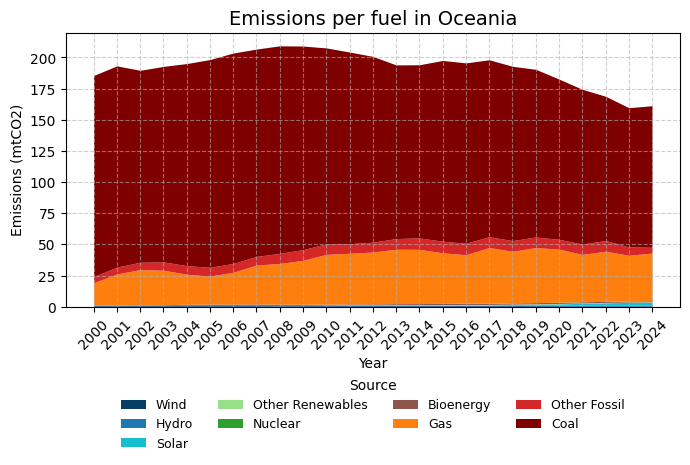

In [18]:
# --- Filter ---
df_Oceania_emissions = df_all[
    (df_all["Continent"] == "Oceania") &
    (df_all["Area type"] == "Country or economy") &
    (df_all["Category"] == "Power sector emissions") &
    (df_all["Subcategory"] == "Fuel") &
    (df_all["Unit"] == "mtCO2")
].copy()

# --- Aggregate & pivot ---
mix_Oceania_emissions = df_Oceania_emissions.groupby(
    ["Year", "Variable"], as_index=False
)["Value"].sum()

mix_pivot_Oceania_emissions = (
    mix_Oceania_emissions
    .pivot(index="Year", columns="Variable", values="Value")
    .fillna(0)
)

# --- Desired order (clean → dirty) ---
energy_order = [
    "Wind",
    "Hydro",
    "Solar",
    "Other Renewables",
    "Nuclear",
    "Bioenergy",
    "Gas",
    "Other Fossil",
    "Coal"
]

# Keep only existing columns & reorder
energy_order = [e for e in energy_order if e in mix_pivot_Oceania_emissions.columns]
mix_pivot_Oceania_emissions = mix_pivot_Oceania_emissions[energy_order]

# --- Color map (updated) ---
energy_color_map = {
    "Wind": "#073e66",
    "Hydro": "#1f77b4",
    "Solar": "#17becf",
    "Other Renewables": "#98df8a",
    "Nuclear": "#2ca02c",
    "Bioenergy": "#8c564b",
    "Gas": "#ff7f0e",
    "Other Fossil": "#d62728",
    "Coal": "#7f0000"
}

colors = [energy_color_map[e] for e in mix_pivot_Oceania_emissions.columns]

# --- Plot ---
fig, ax = plt.subplots(figsize=(7, 5))

mix_pivot_Oceania_emissions.plot(
    kind="area",
    stacked=True,
    linewidth=0,
    ax=ax,
    color=colors
)

ax.set_title("Emissions per fuel in Oceania", fontsize=14)
ax.set_xlabel("Year")
ax.set_ylabel("Emissions (mtCO2)")

ax.set_xticks(mix_pivot_Oceania_emissions.index)
ax.set_xticklabels(mix_pivot_Oceania_emissions.index, rotation=45)

ax.grid(True, axis="both", linestyle="--", alpha=0.6)

# Legend follows column order
ax.legend(
    title="Source",
    loc="upper center",
    bbox_to_anchor=(0.5, -0.22),
    ncol=4,
    fontsize=9,
    title_fontsize=10,
    frameon=False
)

plt.tight_layout()
plt.show()


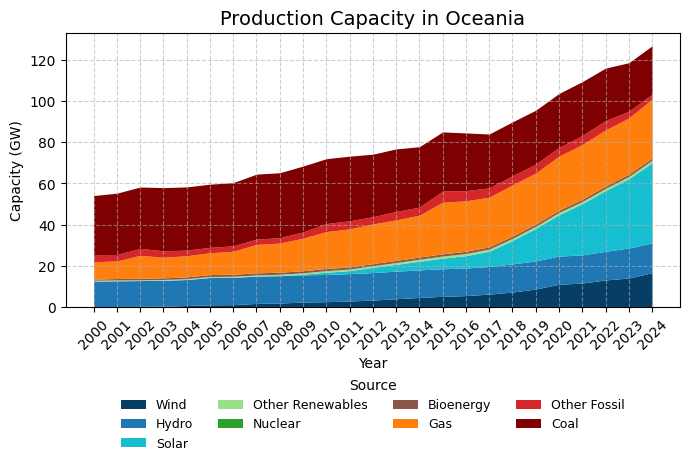

In [19]:
# --- Filter ---
df_Oceania_emissions = df_all[
    (df_all["Continent"] == "Oceania") &
    (df_all["Area type"] == "Country or economy") &
    (df_all["Category"] == "Capacity") &
    (df_all["Subcategory"] == "Fuel") &
    (df_all["Unit"] == "GW")
].copy()

# --- Aggregate & pivot ---
mix_Oceania_emissions = df_Oceania_emissions.groupby(
    ["Year", "Variable"], as_index=False
)["Value"].sum()

mix_pivot_Oceania_emissions = (
    mix_Oceania_emissions
    .pivot(index="Year", columns="Variable", values="Value")
    .fillna(0)
)

# --- Desired order (clean → dirty) ---
energy_order = [
    "Wind",
    "Hydro",
    "Solar",
    "Other Renewables",
    "Nuclear",
    "Bioenergy",
    "Gas",
    "Other Fossil",
    "Coal"
]

# Keep only existing columns & reorder
energy_order = [e for e in energy_order if e in mix_pivot_Oceania_emissions.columns]
mix_pivot_Oceania_emissions = mix_pivot_Oceania_emissions[energy_order]

# --- Color map (updated) ---
energy_color_map = {
    "Wind": "#073e66",
    "Hydro": "#1f77b4",
    "Solar": "#17becf",
    "Other Renewables": "#98df8a",
    "Nuclear": "#2ca02c",
    "Bioenergy": "#8c564b",
    "Gas": "#ff7f0e",
    "Other Fossil": "#d62728",
    "Coal": "#7f0000"
}

colors = [energy_color_map[e] for e in mix_pivot_Oceania_emissions.columns]

# --- Plot ---
fig, ax = plt.subplots(figsize=(7, 5))

mix_pivot_Oceania_emissions.plot(
    kind="area",
    stacked=True,
    linewidth=0,
    ax=ax,
    color=colors
)

ax.set_title("Production Capacity in Oceania", fontsize=14)
ax.set_xlabel("Year")
ax.set_ylabel("Capacity (GW)")

ax.set_xticks(mix_pivot_Oceania_emissions.index)
ax.set_xticklabels(mix_pivot_Oceania_emissions.index, rotation=45)

ax.grid(True, axis="both", linestyle="--", alpha=0.6)

# Legend follows column order
ax.legend(
    title="Source",
    loc="upper center",
    bbox_to_anchor=(0.5, -0.22),
    ncol=4,
    fontsize=9,
    title_fontsize=10,
    frameon=False
)

plt.tight_layout()
plt.show()
